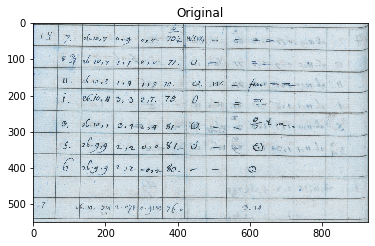

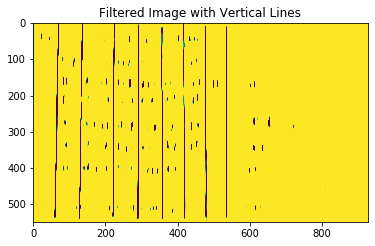

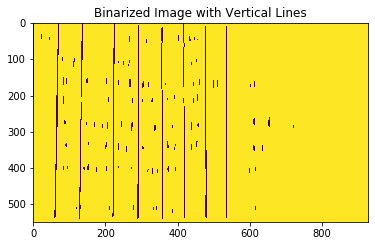

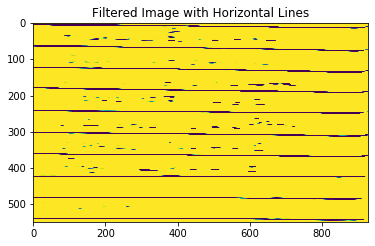

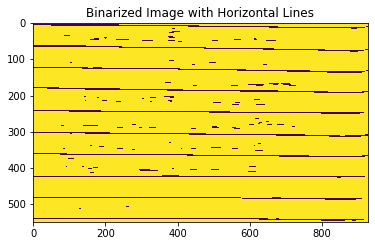

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def _get_kernel(theta) -> float:
    ksize = 31
    return cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)

    
def filter_image(img, theta=np.pi):
    kernel = _get_kernel(theta)
    img_filtered = cv2.filter2D(img, cv2.CV_8UC3, kernel)
    return cv2.cvtColor(img_filtered, cv2.COLOR_BGR2GRAY)


def load_image(path: str):
    return cv2.imread(path)


def binarize_image(img):   
    ret, img_binarized = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
    return img_binarized

    
def show_image(img, title="") -> None:
    plt.imshow(img)
    plt.title(title)
    plt.show()
    

def run():
    img = load_image('./assets/scan--no-borders.png')
    show_image(img, "Original")
    
    img_filtered = filter_image(img, theta=np.pi)
    show_image(img_filtered, "Filtered Image with Vertical Lines")
    
    img_binarized = binarize_image(img_filtered.copy())
    show_image(img_binarized, "Binarized Image with Vertical Lines")
    
    img_filtered = filter_image(img, theta=np.pi/2)
    show_image(img_filtered, "Filtered Image with Horizontal Lines")
    
    img_binarized = binarize_image(img_filtered.copy())
    show_image(img_binarized, "Binarized Image with Horizontal Lines")
    
    
run()